## **Flight Fare Prediction**

### Goal:
    The main goal is to predict the fares of the flights based on different factors available in
    the provided dataset.

### Approach: 
    The classical machine learning tasks like Data Exploration, Data Cleaning,
    Feature Engineering, Model Building and Model Testing. Try out different machine
    learning algorithms that’s best fit for the above case.
### Dataset:
    The dataset I used is linked below.
    https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh
        
    

### Importing Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the Files and creating Data frame

In [3]:
Train_data=pd.read_excel("/Users/aniketdas/Desktop/Flight_fare_prediction/archive/Data_Train.xlsx")
Test_data=pd.read_excel("/Users/aniketdas/Desktop/Flight_fare_prediction/archive/Test_set.xlsx")
flight_df=Train_data.append(Test_data,sort=False)
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


### Finding insights on data

In [4]:
flight_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
flight_df.info()
flight_df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

## Performing EDA(Exploratory Data Analysis)

### Feature Information

- Airline: Name of the Airline from which the Ticket is Booked.
- Date_of_Journey: Date of Journey of the Traveller.
- Source: Source from which the Airline Would Departure.
- Destination: Destination to Which Airline Would Arrive.
- Route: Route of the Airline from Source to Destination.
- Dep_Time: Time at which Flight Would Departure from the Source.
- Arrival_Time: Time at which Flight Would Arrive at the Destination.
- Duration: Duration that Airline Takes to fly from Source to Destination.
- Total_Stops: Total No of Stops that Airline takes Between Source and Destination.
- Additional_Info: Any Additional Info about the Airline.
- Price: Fare of the Ticket to fly from Source to Destination.

### Top 10 preferred airlines

<Figure size 1920x1440 with 0 Axes>

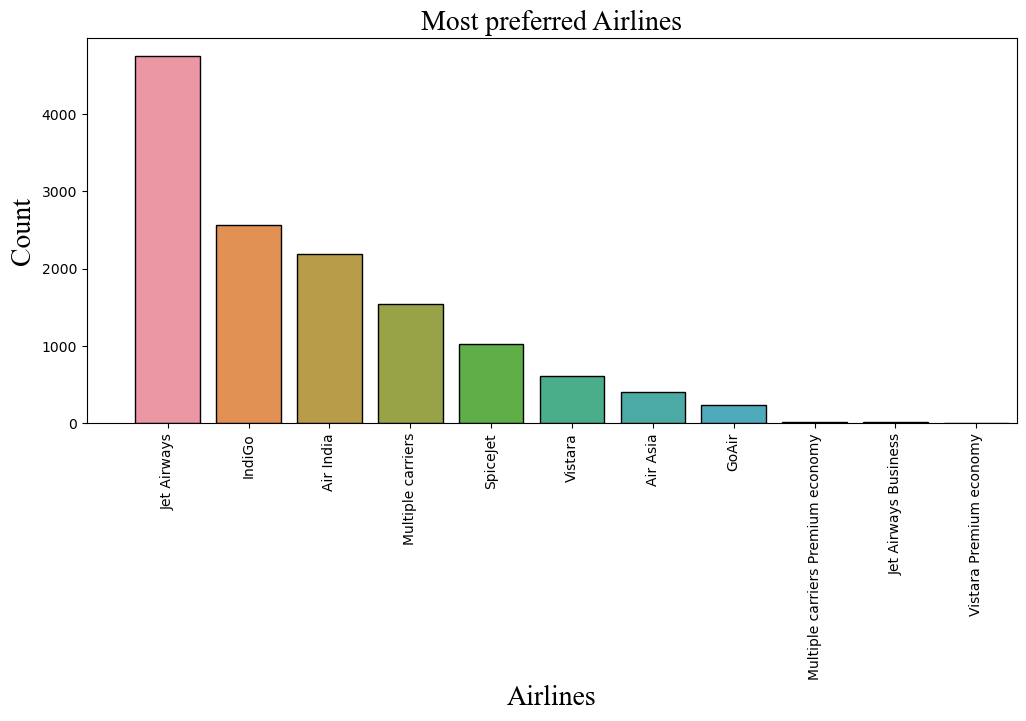

In [6]:
plt.figure(dpi=300)
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=flight_df,order = flight_df['Airline'].value_counts().index,ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Most preferred Airlines",fontdict=font_style)
plt.ylabel("Count",fontdict=font_style)
plt.xlabel("Airlines",fontdict=font_style)
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

Insight : Most preferred airlines is Jet Airways followed by Indigo and Air India

### Airline vs Flight Price grapgh

In [7]:
airlines = flight_df.groupby('Airline').Price.max()
airlines_df= airlines.to_frame().sort_values('Price',ascending=False)[0:10]
airlines_df

,Price
Airline,
Jet Airways Business,79512.0
Jet Airways,54826.0
Multiple carriers,36983.0
Air India,31945.0
SpiceJet,23267.0
GoAir,22794.0
IndiGo,22153.0
Vistara,21730.0
Multiple carriers Premium economy,14629.0


<Figure size 1920x1440 with 0 Axes>

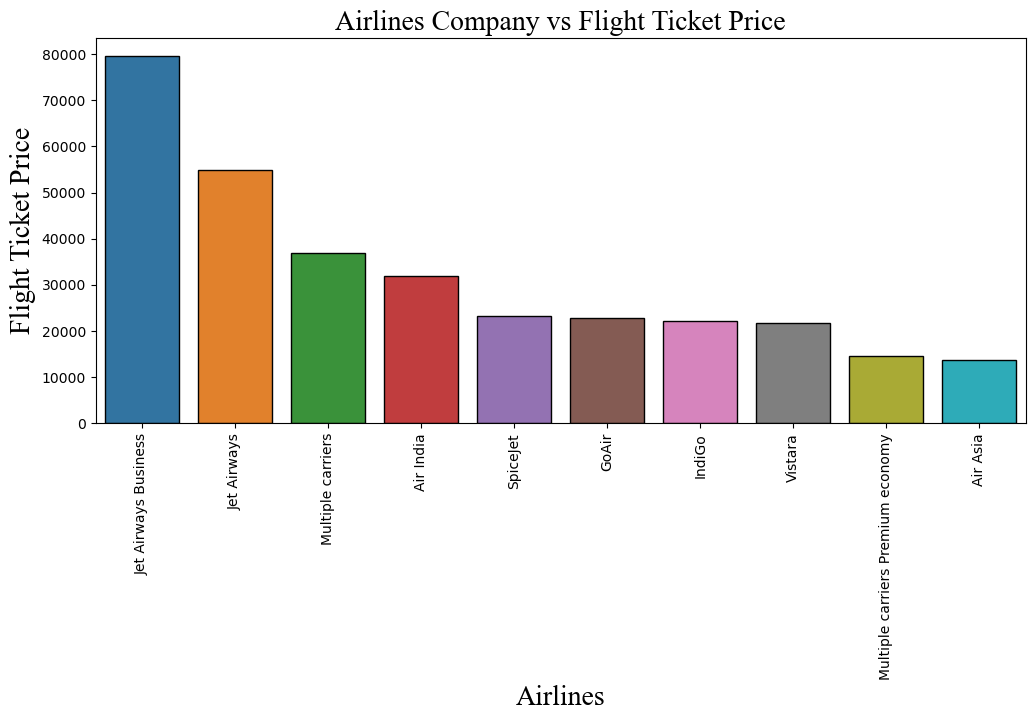

In [8]:
plt.figure(dpi=300)
plt.subplots(figsize=(12,5))
sns.barplot(x=airlines_df.index, y=airlines_df["Price"],ec = "black")
font_style={'family':'times new roman','size':20,'color':'black'}
plt.title("Airlines Company vs Flight Ticket Price",fontdict=font_style )
plt.ylabel("Flight Ticket Price", fontdict=font_style)
plt.xlabel("Airlines", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

Insight : Jet Airways Business is the most expensive ticket.

### Ticket price on Weekdays vs Weekends

In [9]:
days_df = flight_df[['Airline', 'Date_of_Journey' , 'Price']].copy()
days_df.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897.0
1,Air India,1/05/2019,7662.0
2,Jet Airways,9/06/2019,13882.0
3,IndiGo,12/05/2019,6218.0
4,IndiGo,01/03/2019,13302.0


In [10]:
days_df['Date_of_Journey'] = pd.to_datetime(days_df['Date_of_Journey'],format='%d/%m/%Y')
days_df['Weekday'] = days_df['Date_of_Journey'].dt.day_name()
days_df['Weekend'] = days_df['Weekday'].apply(lambda day: 1 if day == 'Sunday' else 0)
days_df.head()                                         

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897.0,Sunday,1
1,Air India,2019-05-01,7662.0,Wednesday,0
2,Jet Airways,2019-06-09,13882.0,Sunday,1
3,IndiGo,2019-05-12,6218.0,Sunday,1
4,IndiGo,2019-03-01,13302.0,Friday,0


<Figure size 1920x1440 with 0 Axes>

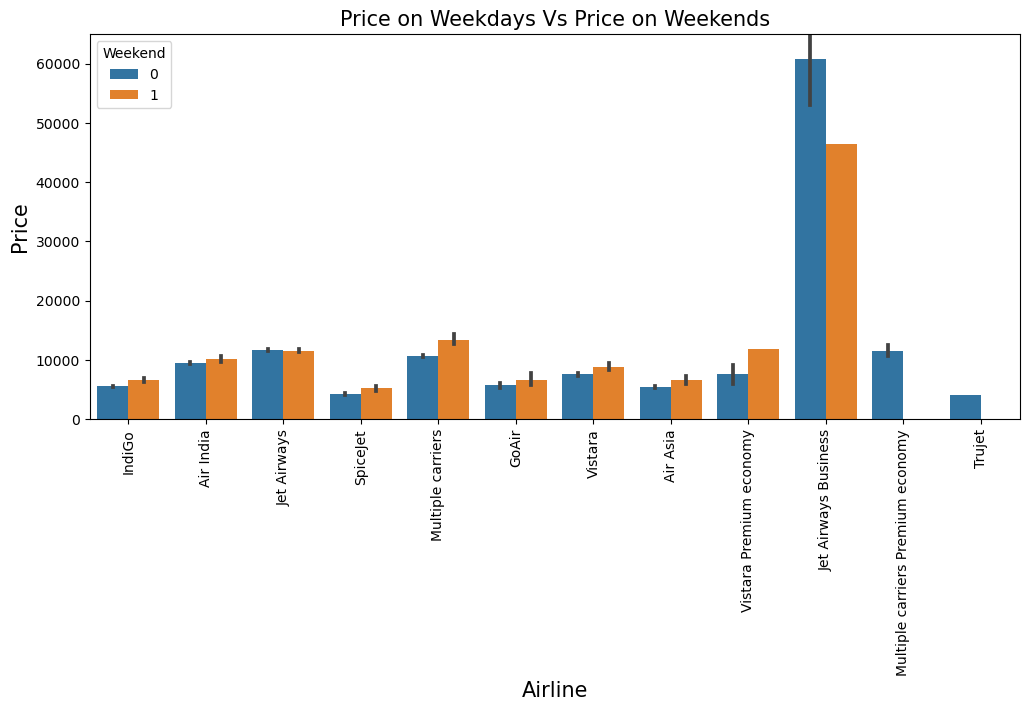

In [11]:
plt.figure(dpi=300)
plt.subplots(figsize=(12,5))
sns.barplot(data=days_df,x='Airline',y='Price',hue='Weekend')
plt.xlabel("Airline",size = 15)
plt.xticks(rotation = 90)
plt.ylabel("Price",size = 15)
plt.title("Price on Weekdays Vs Price on Weekends",size = 15)
plt.legend(title='Weekend'.title())
plt.ylim(0,65000)
plt.show()

Insights :  Weekends show a hike in ticket prices.

## Feature Engineering

In [12]:
# Extact day, month, year from Date_of_Journey feature and store them in new columns. 

flight_df["Journey_date"]=flight_df["Date_of_Journey"].str.split("/").str[0].astype(int)
flight_df["Journey_month"]=flight_df["Date_of_Journey"].str.split("/").str[1].astype(int)
flight_df["Journey_year"]=flight_df["Date_of_Journey"].str.split("/").str[2].astype(int)

flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [13]:
# Now Date_of_Journey column is no longer required, so we can drop it.

flight_df=flight_df.drop(["Date_of_Journey"],axis=1)

In [14]:
flight_df["Journey_year"].value_counts()

2019    13354
Name: Journey_year, dtype: int64

In [15]:
# Since Journey_year is the same ("2019") for all rows, we can drop it.
flight_df=flight_df.drop(["Journey_year"],axis=1)
flight_df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3


In [16]:
# Calculating the Total_stops
flight_df["Total_Stops"]=flight_df["Total_Stops"].str.split(" ").str[0]
flight_df["Total_Stops"]=flight_df["Total_Stops"].replace("non-stop","0")
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3


In [17]:
# Extracting hours and min from Arrival time, Departure time

# Arrival_Time
flight_df["Arrival_Time"]=flight_df["Arrival_Time"].str.split(" ").str[0]
flight_df['Arrival_hour']=flight_df["Arrival_Time"].str.split(':').str[0].astype(int)
flight_df['Arrival_min']=flight_df["Arrival_Time"].str.split(':').str[1].astype(int)
flight_df=flight_df.drop(["Arrival_Time"],axis=1)

#Dep_Time
flight_df['Dep_hour']=flight_df["Dep_Time"].str.split(':').str[0].astype(int)
flight_df['Dep_min']=flight_df["Dep_Time"].str.split(':').str[1].astype(int)
flight_df=flight_df.drop(["Dep_Time"],axis=1)

flight_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,21,35,16,50


In [18]:
# We can drop the Route column since we already covered it in the Total_stops column.
# Additional_Info is almost null so we drop it.

flight_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [19]:
# Seperating the hours(h) from Duration into minutes(m) 

flight_df["Duration_hr"]=flight_df["Duration"].str.split('h').str[0]
flight_df['Duration_hr'].str.contains('m').sum()

2

In [20]:
flight_df[flight_df['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr
6474,Air India,Mumbai,Hyderabad,5m,2,17327.0,6,3,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2,NaN,12,3,16,55,16,50,5m


In [21]:
flight_df["Duration_hr"]=flight_df["Duration_hr"].replace("5m","0")

In [22]:
flight_df["Duration_min"]=flight_df["Duration"].str.split(' ').str[1].str.split('m').str[0]
flight_df['Duration_min'].fillna("0",inplace=True)
flight_df["Duration"]=(flight_df["Duration_hr"].astype(int)*60) + flight_df["Duration_min"].astype(int)
flight_df=flight_df.drop(['Duration_hr','Duration_min'],axis=1)
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302.0,1,3,21,35,16,50


## Inspecting for Null Values

In [23]:
flight_df.isnull().sum()

Airline             0
Source              0
Destination         0
Duration            0
Total_Stops         1
Price            2671
Journey_date        0
Journey_month       0
Arrival_hour        0
Arrival_min         0
Dep_hour            0
Dep_min             0
dtype: int64

In [24]:
## Since Price column has null values, fill it with the mean

flight_df["Price"].fillna(flight_df["Price"].mean(),inplace=True)

In [25]:
## Filling the null values in Total_Stops

flight_df["Total_Stops"].value_counts()

1    7056
0    4340
2    1899
3      56
4       2
Name: Total_Stops, dtype: int64

In [26]:
## Since 1 is the most frequent value, we are gonna assume the null value as 1

flight_df["Total_Stops"]= flight_df["Total_Stops"].fillna('1')
flight_df["Total+Stops"]= flight_df["Total_Stops"].astype(int)

In [27]:
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Total+Stops
0,IndiGo,Banglore,New Delhi,170,0,3897.0,24,3,1,10,22,20,0
1,Air India,Kolkata,Banglore,445,2,7662.0,1,5,13,15,5,50,2
2,Jet Airways,Delhi,Cochin,1140,2,13882.0,9,6,4,25,9,25,2
3,IndiGo,Kolkata,Banglore,325,1,6218.0,12,5,23,30,18,5,1
4,IndiGo,Banglore,New Delhi,285,1,13302.0,1,3,21,35,16,50,1


## Using Label Encoder to handle categorical data

### Features with categorical data
    Airline
    Source
    Destination

In [28]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
for i in ["Airline","Source","Destination"]:
    flight_df[i]=la.fit_transform(flight_df[i])
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Total+Stops
0,3,0,5,170,0,3897.0,24,3,1,10,22,20,0
1,1,3,0,445,2,7662.0,1,5,13,15,5,50,2
2,4,2,1,1140,2,13882.0,9,6,4,25,9,25,2
3,3,3,0,325,1,6218.0,12,5,23,30,18,5,1
4,3,0,5,285,1,13302.0,1,3,21,35,16,50,1


### Finding out the best feature which will have good relation with 'Price'

<Figure size 1920x1440 with 0 Axes>

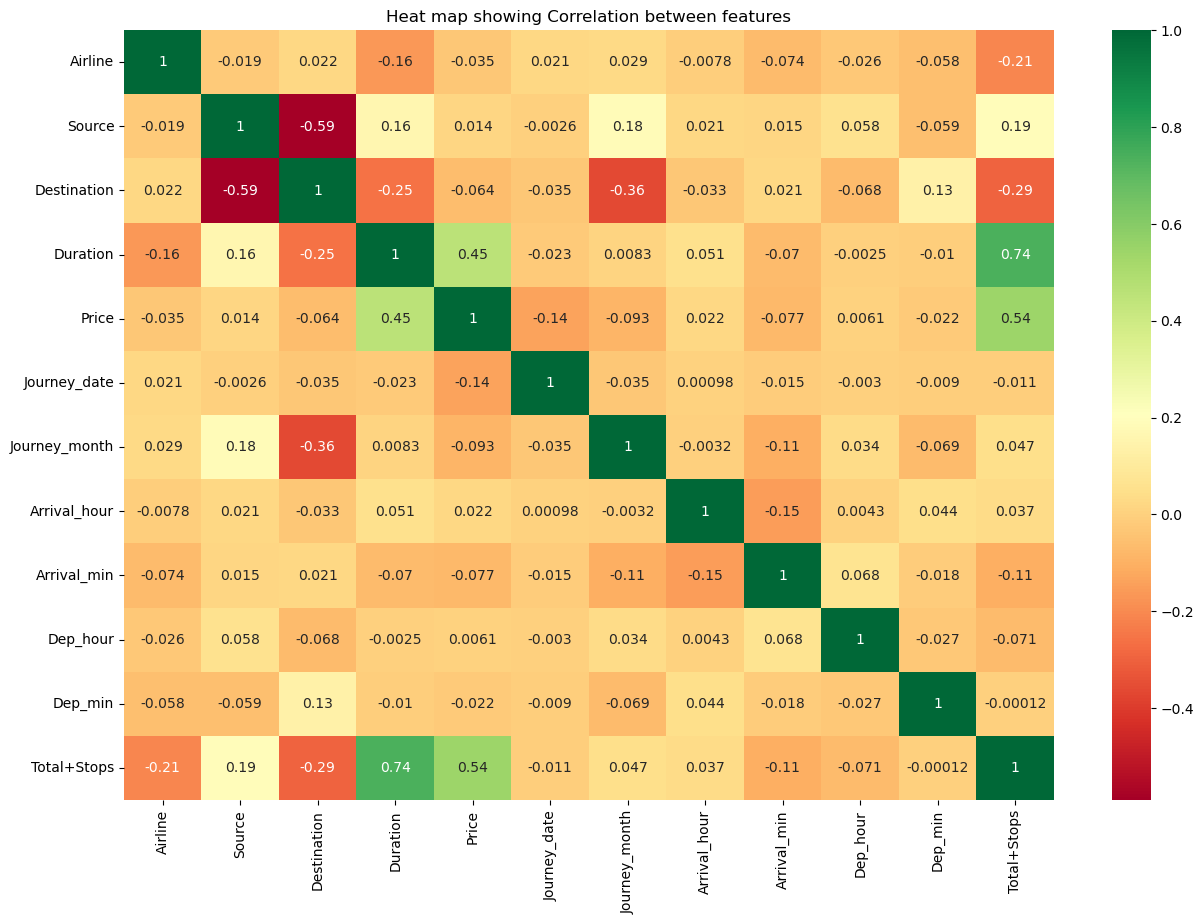

In [29]:
plt.figure(dpi=300)
plt.figure(figsize=(15,10))
sns.heatmap(flight_df.corr(),annot=True,cmap='RdYlGn')
plt.title("Heat map showing Correlation between features")
plt.show()

## There is a high correlation between
    Price and Total_Stops
    Duration and Total_Stops
    Price and Flight duration

## Building the Machine Learning Models
### For predicting the price, we will create 3 Machine Learning models
    1/ K neighbours Regressor
    2/ Decision Tree Regressor
    3/ Random Forest Regressor

In [30]:
#splitting data into x and y
train_df=flight_df[0:10683]
test_df=flight_df[10683:]
x=train_df.drop(["Price"],axis=1)
y=train_df.loc[:,["Price"]].values
# spiliting the dataset into train data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [31]:
#Import Models

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [32]:
#function to train the models

def predict(algorithm):
    print("Algorithm:",algorithm)
    model=algorithm.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("The Predicted Price values are:",y_pred)
    print('\n')
    r2=r2_score(y_test,y_pred)
    print("r2 score :",r2)
    #updating score in df  
    #score=score.append({'Model':algorithm,'Accuracy':r2})
    print('MAE:',(mean_absolute_error(y_test,y_pred)))
    print('MSE:',(mean_squared_error(y_test,y_pred)))
    return(r2)

In [33]:
knn=predict(KNeighborsRegressor())

Algorithm: KNeighborsRegressor()
The Predicted Price values are: [[ 8399.4]
 [ 3843.4]
 [10933. ]
 ...
 [14808.8]
 [ 6443.2]
 [ 6902.4]]


r2 score : 0.587377873150303
MAE: 1770.7484837139648
MSE: 8596996.244522652


In [34]:
dt=predict(DecisionTreeRegressor())

Algorithm: DecisionTreeRegressor()
The Predicted Price values are: [ 7048.  3857. 10991. ... 14441.  7229.  6276.]


r2 score : 0.6278507750512021
MAE: 1420.3092599525771
MSE: 7753741.937480345


In [35]:
rf=predict(RandomForestRegressor())

Algorithm: RandomForestRegressor()
The Predicted Price values are: [ 6872.53    3844.8035 11501.515  ... 14170.3755  6748.265   6074.19  ]


r2 score : 0.8000351915866206
MAE: 1194.3499505418558
MSE: 4166273.6802108474


In [36]:
#Creating a dataframe to store the accuracy of 3 models

score_df=pd.DataFrame({'Model': ['K-Nearest Neighbour',
                                 'Decision Tree','Random Forest'], 
                       'Accuracy': [ knn*100,dt*100, rf*100]})
score_df

,Model,Accuracy
0,K-Nearest Neighbour,58.737787
1,Decision Tree,62.785078
2,Random Forest,80.003519


### The Random Forest Regressor is giving the most accurate results out of the 3


## Hyperparameter tuning 

In [37]:
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/aniketdas/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/aniketdas/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/aniketdas/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/aniketdas/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_featur

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [38]:
# best parameter

rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [39]:
#predicting the values

pred=rf_model.predict(x_test)
r2_score(y_test,pred)

0.8199804192972563

In [40]:
print('r2_score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2_score: 0.8199804192972563
MAE: 1136.0919351871319
MSE: 3750714.1729356973
RMSE: 1936.6760629841267


## After Hypertuning
    For Random Forest Regressor,
    Before hyper tuning, R2 score = 80 %
    After hyper tuning, R2 score = 82 %
    The value of MAE drops as well, indicating that we are successful in tunning our model.

## Conclusion

> We have used random forest regressor for training the model and improved its accuracy by doing hyperparameter tuning.
> As a result, we have trained our Random Forest Regression model, to forecast fares of flight tickets, with an R2 score of 82 %.

## Saving the Model

In [41]:
import pickle

#open a file
file=open('flight_model.pkl','wb')

#dump information to that file
pickle.dump(rf_model,file)

In [42]:
model = open('flight_model.pkl','rb')
forest = pickle.load(model)

In [43]:
result=forest.predict(x_test)
print("The predicted prices are",result)
print("r2 score = ",r2_score(y_test,result))

The predicted prices are [ 7121.03702361  3856.55222787 11734.61795048 ... 14071.19730754
  6444.05706054  6487.44476786]
r2 score =  0.8199804192972563
